# CS3244 Group Project

# Preparation of the dataset:
## Steps Required:
  1. Import all the necessary Python libraries (numpy, pandas, matplotlib, seaborn).
  2. Import the Guns Incident CSV File from Google Drive.
  3. Observe the features and target of the Guns Incident Dataset.

In [ ]:
# Step 1: Importing all the relevant libraries for the Machine Learning Project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Importing the Guns Incident CSV File from Google Drive

from google.colab import drive
drive.mount('/content/drive')

data = '/content/drive/MyDrive/CS3244 Gun Incidence/Guns incident Data.csv'
df = pd.read_csv(data)

Mounted at /content/drive


In [ ]:
# Step 3: Observe the features and target of the Guns Incident Dataset

# Observing the shape of the dataset (number of rows and columns of dataset)
print(df.shape)

# Observing the first few rows of the dataset and its contents
df.head()

(100798, 12)


,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident,Police involvement
0,1,2017,1,6/1/17,Suicide,Bachelors,Male,35.0,Asian/Pacific Islander,100,Home,0
1,2,2017,1,19/1/17,Suicide,Some college,Female,22.0,White,100,Street,0
2,3,2017,1,1/1/17,Suicide,Bachelors,Male,61.0,White,100,Other specified,0
3,4,2017,2,6/2/17,Suicide,Bachelors,Male,65.0,White,100,Home,0
4,5,2017,2,9/2/17,Suicide,High School,Male,32.0,White,100,Other specified,0


After printing the shape of the dataset, we observed that the dataset contains 100798 rows and 12 columns before the cleaning process. The 12 columns include S.No., Year, Month, Date, Reason, Education, Sex, Age, Race, Hispanic, Place of incident and Police involvement.

# Data Cleaning
  ## Steps Required
  1. Check that the data types of all the columns are correct.
  2. Dealing with missing/NA values present in the dataset.
  3. Check for any duplicates and remove them accordingly.
  4. Remove irrelevant features/columns from dataset that do not contribute to the outcome.

In [ ]:
# Step 1: Check if all the columns of dataset have the right datatype

df.dtypes.rename("Data Type").reset_index()

,index,Data Type
0,S.No.,int64
1,Year,int64
2,Month,int64
3,Date,object
4,Reason,object
5,Education,object
6,Sex,object
7,Age,float64
8,Race,object
9,Hispanic,int64


When the column data types of the dataset are observed, it seems that for the 'Date' column, the Data Type is 'object', which is not correct. We need to set the Data Type of the 'Date' column to a 'datetime' Data Type instead. For the remaining columns of the dataset, the datatypes are either correct or plausible.

In [ ]:
# Convert the 'Date' column to a 'datetime' Data Type

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df.dtypes.rename("Data Type").reset_index()

,index,Data Type
0,S.No.,int64
1,Year,int64
2,Month,int64
3,Date,datetime64[ns]
4,Reason,object
5,Education,object
6,Sex,object
7,Age,float64
8,Race,object
9,Hispanic,int64


In [ ]:
# Step 2: Dealing with missing/NA values in the dataset

df.isna().sum().rename("Number of NAs").reset_index()

,index,Number of NAs
0,S.No.,0
1,Year,0
2,Month,0
3,Date,0
4,Reason,0
5,Education,1422
6,Sex,0
7,Age,18
8,Race,0
9,Hispanic,0


Upon calculating the total number of NA values for each column of the dataset, we observe that there are 1422 NAs for education, 18 NAs for Age and 1384 NAs for Place of incident. The rest of the columns do not have any NA values.

Replacing the NA values with the mode/mean/median might affect the accuracy and results of the Machine Learning algorithms implemented subsequently, hence imputation might not be a suitable option to replace the NA values. Additionally, we have more than 100000 rows of data, implying that we have sufficent data for training, validation and testing. Hence, the best approach is to simply remove the data rows containing NA values from the dataset.

In [ ]:
# Remove all the NA values from the dataset
df.dropna(inplace = True)

# Observe the modified shape of the dataset
print(df.shape)

(98015, 12)


The dataset now contains 98015 rows instead of the initial 100798 rows, suggesting that we have successfully removed all the rows containing NA values. There are 100798 - 98015 = 2783 rows that contain at least one NA value.

In [ ]:
# Step 3: Check for any duplicates in the dataset

# First, we need to remove the S.No. column as S.No. is unique for all data rows
df.drop(columns = ['S.No.'], inplace = True)

# Check the total number of duplicates in the dataset
number_duplicates = df.duplicated().sum()
print(f'No. of duplicate rows: {number_duplicates}')

No. of duplicate rows: 3096


We observed that there are 3096 duplicate rows in the dataset. highlighting that we need to remove these duplicate rows before analysis as duplicate entries will also affect the results of the Machine Learning Algorithm.

In [ ]:
# Drop the duplicates in the dataset
df.drop_duplicates(inplace = True)

# Observe the modified shape of the dataset
df.shape

(94919, 11)

After printing out the shape of the dataset, there are 94919 rows left. This shows that all the duplicated rows of the dataset are removed as well. 98015 - 94919 = 3096 duplicated rows are removed, which tallies with our initial observation.

In [ ]:
# Step 4: Removing all the irrelevent features/columns from the dataset

# Remove Year and Month columns as the same information is found in the Date column
df.drop(columns=['Year', 'Month'], inplace = True)

# Remove Hispanic column as it does not make any sense having random values
df.drop(columns=['Hispanic'], inplace = True)

For the irrelevent features/columns of the dataset, first we removed the Year and Month columns as the year and month information is already reflected in the Date column of the dataset, suggesting that the Year and Month columns are duplicates of the Date columns and should be removed. We also removed the Hispanic column as we do not know what the values of Hispanic (eg. 100, 701) are referring to and it does not make any sense for Hispanic to have a certain numerical value that is not boolean-related. To prevent confusion, we dropped the Hispanic column as well.

In [ ]:
print(df['Police involvement'].value_counts())

# since police involvement feature is highly imbalanced, might remove as well???/

Police involvement
0    94900
1       19
Name: count, dtype: int64


In [ ]:
# Printing the final cleaned dataset for checking

df.head(n = 10)

,Date,Reason,Education,Sex,Age,Race,Place of incident,Police involvement
0,2017-01-06,Suicide,Bachelors,Male,35.0,Asian/Pacific Islander,Home,0
1,2017-01-19,Suicide,Some college,Female,22.0,White,Street,0
2,2017-01-01,Suicide,Bachelors,Male,61.0,White,Other specified,0
3,2017-02-06,Suicide,Bachelors,Male,65.0,White,Home,0
4,2017-02-09,Suicide,High School,Male,32.0,White,Other specified,0
5,2017-02-26,Suicide,Less than High School,Male,18.0,Native American/Native Alaskan,Home,0
6,2017-02-21,Undetermined,High School,Male,49.0,White,Home,0
7,2017-03-18,Suicide,High School,Male,42.0,Native American/Native Alaskan,Home,0
8,2017-02-13,Accidental,Some college,Male,51.0,White,Other specified,0
10,2017-02-03,Suicide,Some college,Male,31.0,White,Home,0


# Visualising The Dataset Features And Outcome (Explanatory Data Analysis)
  Used matplotlib and seaborn libraries to visualise the dataset features and outcome through diagrams such as bar charts.

## Diagram 1: Visualising the distribution of the target variable, 'Reason'.

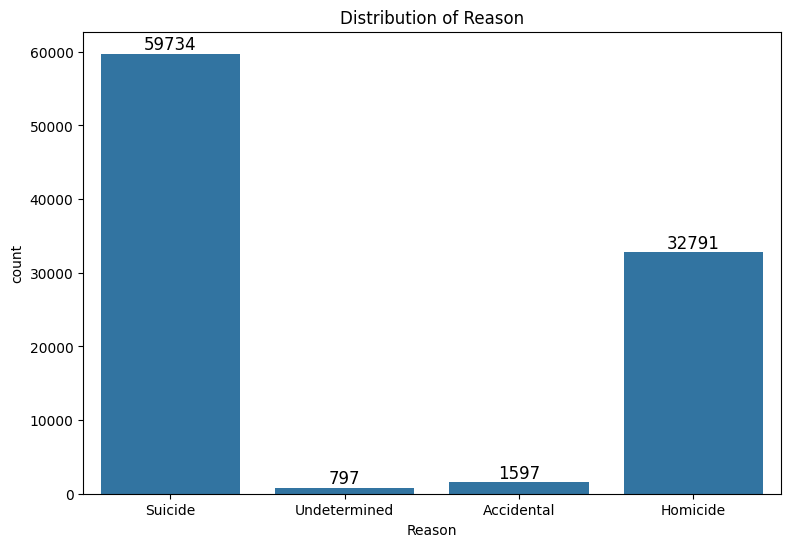

In [ ]:
# Analysing the distribution of the target variable, 'Reason', using a bar chart.
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', data=df)
plt.title('Distribution of Reason')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

From the bar chart plotted, we observe that Suicide and Homicide contribute to a large proportion of deaths (around 60000 for Suicide and more than 30000 for Homicide). However, Undetermined and Accidental contribute to very few cases of death (less than 2000 each for both categories). Hence, we combined Undertermined and Accidental categories into a broader category called Others.

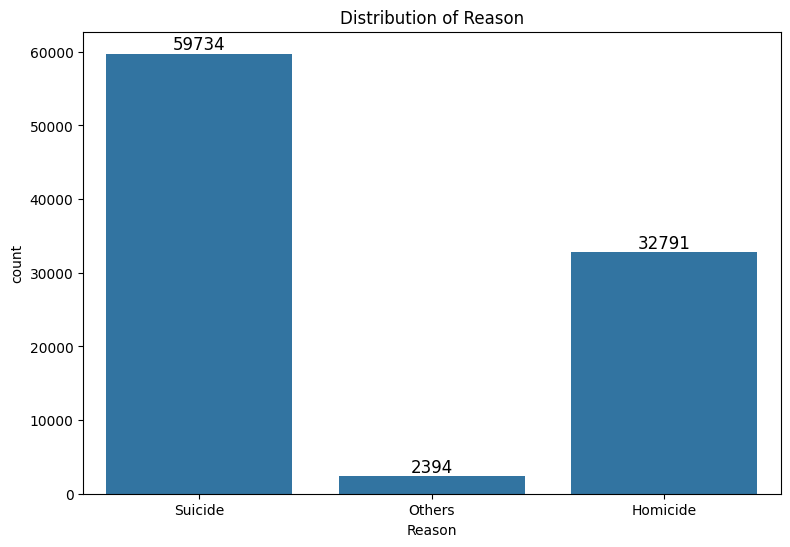

In [ ]:
# Combining Undetermined and Accidental categories into Others
df['Reason'] = df['Reason'].replace(['Accidental', 'Undetermined'], 'Others')

# Plot the new resultant diagram after the new classification
plt.figure(figsize=(9, 6))
bx=sns.countplot(x ='Reason', data = df)
plt.title('Distribution of Reason')
for p in bx.patches:
    bx.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

## Diagram 2: Visualising the distribution of the feature 'Place of incident'.

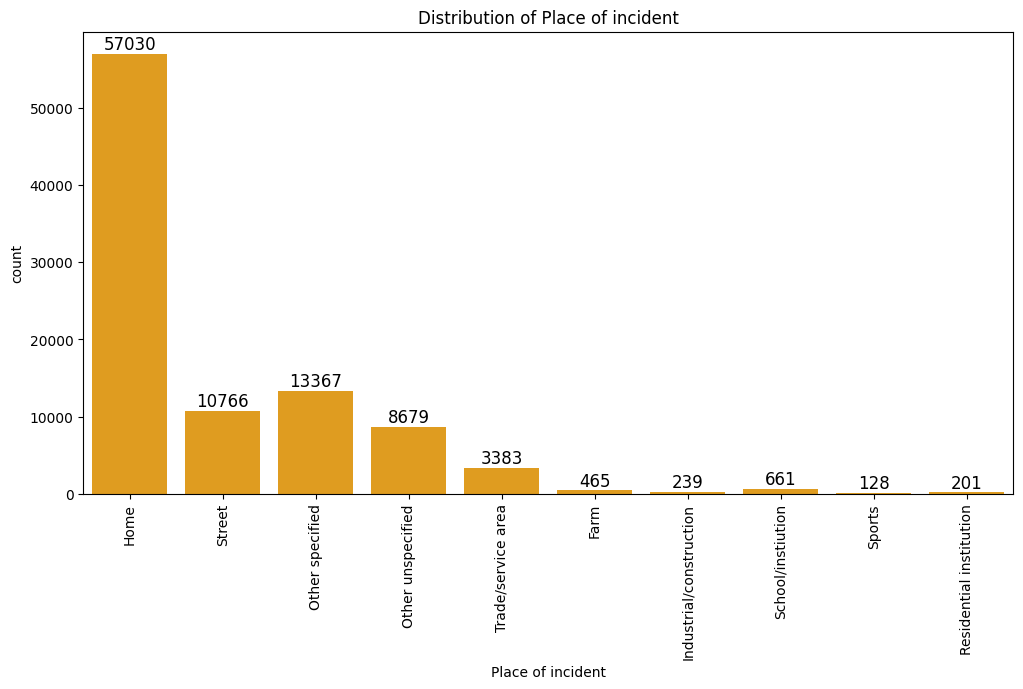

In [ ]:
# Analysing the distribution of the categorical variable, 'Place of incident', using a bar chart.
plt.figure(figsize=(12, 6))
cx=sns.countplot(x = 'Place of incident', data = df, color = 'orange')
plt.title('Distribution of Place of incident')
plt.xticks(rotation = 90)
for p in cx.patches:
    cx.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

From the bar chart plotted, the known places of incident mostly come from Home and Street. We will classify 'Other specified' and 'Other unspecified' into a category called 'Other Places'. The rest of the categories, including 'Trade/service area', 'Farm', 'Industrial/construction', 'School/institution' and 'Sports', contain few observations and for simplicity, we classify these categories as 'Miscellaneous'.

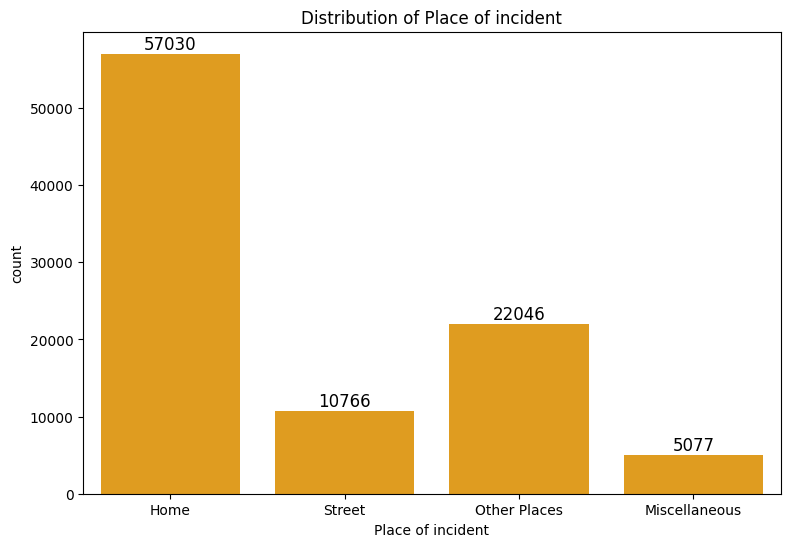

In [ ]:
# Combining 'Other specified' and 'Other unspecified' into the column 'Other Places'.
df['Place of incident'] = df['Place of incident'].replace(['Other specified', 'Other unspecified'], 'Other Places')

# Combining 'Trade/service area', 'Farm', 'Industrial/construction', 'School/institution' and 'Sports' into the column 'Miscellaneous'.
df['Place of incident'] = df['Place of incident'].replace(['Trade/service area', 'Farm', 'Industrial/construction', 'School/instiution', 'Sports', 'Residential institution'], 'Miscellaneous')

# Plot the new resultant diagram after the new classification
plt.figure(figsize=(9, 6))
ax=sns.countplot(x = 'Place of incident', data = df, color = 'orange')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Place of incident')
plt.show()

## Diagram 3: Visualising the distribution of the feature 'Age'.


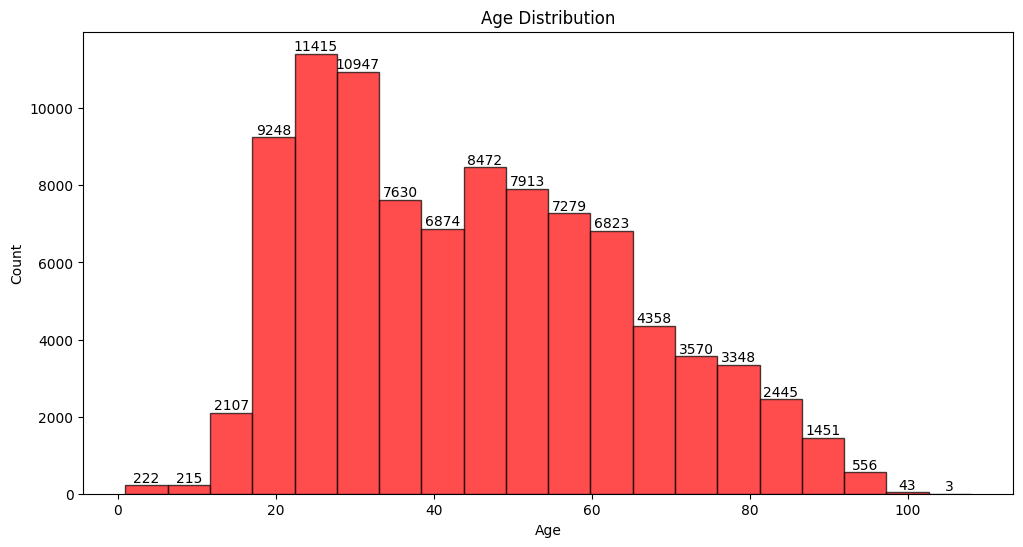

In [ ]:
# Analysing the distribution of the numerical variable 'Age' using a histogram
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(df['Age'], bins=20, color='red', edgecolor='black', alpha=0.7)
for count, bin_edge, patch in zip(counts, bins, patches):
    bar_center = patch.get_x() + patch.get_width() / 2
    plt.text(bar_center, count + 2,
             f'{int(count)}',
             ha='center', va='bottom',
             fontsize=10, color='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


From the histogram, we observe that the age ranges from a very small number (close to 0) to a very large number (around 100). Most people have the age range of between 20 and 60. We do not observe any significant skew (left skew/right skew) in the age range.

## Diagram 4: Visualising the distribution of the outcome 'Reason' with respect to the feature 'Place of incident'.

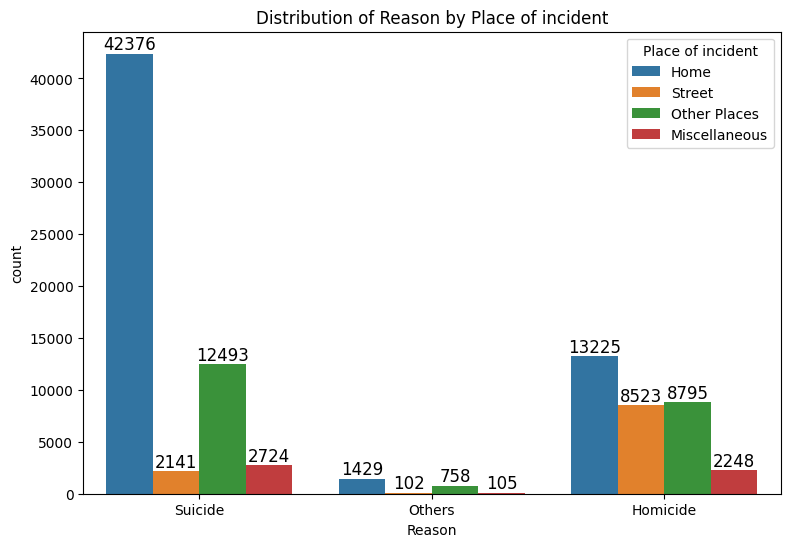

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Place of incident' using a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Place of incident', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Place of incident')
plt.show()


From the countplot diagram, we observed that for all the three reasons - 'Suicide', 'Others' and 'Homicide', the place of incident 'Home' contributes the most. Furthermore, the place of incident 'Other Places' contributes the second most for all three reasons as well. For the reason 'Others', 'Street' and 'Miscellaneous' have near zero cases.

## Diagram 5: Visualising the distribution of the outcome 'Reason' with respect to the feature 'Race'.

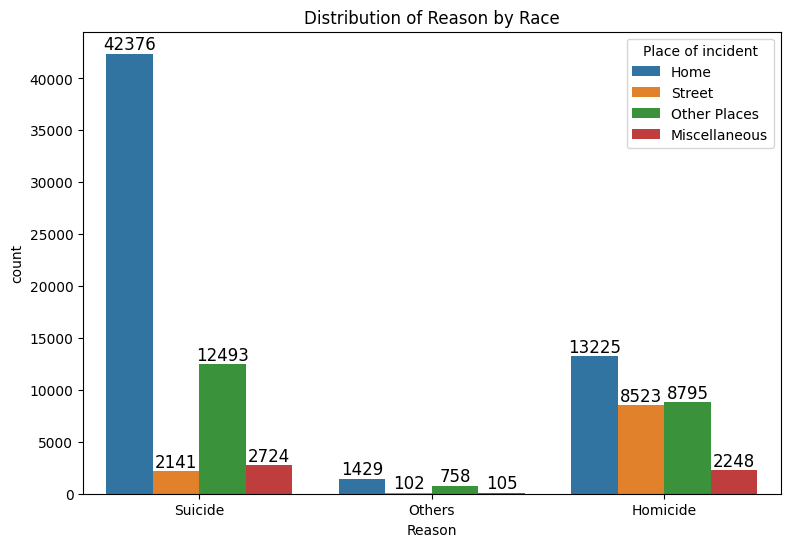

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Race' using a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Place of incident', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Race')

plt.show()

Through the countplot, we observed that for the reason 'Suicide' and 'Others', 'White' race contributes the most while for the reason 'Homicide', 'Black' race contributes the most. Also, races 'Asian/Pacific Islander' and 'Native American/Native Alaskan' contribute insignificantly to all the three reasons.

## Diagram 6: Visualising the distribution of the outcome 'Reason' with respect to the feature 'Education'.

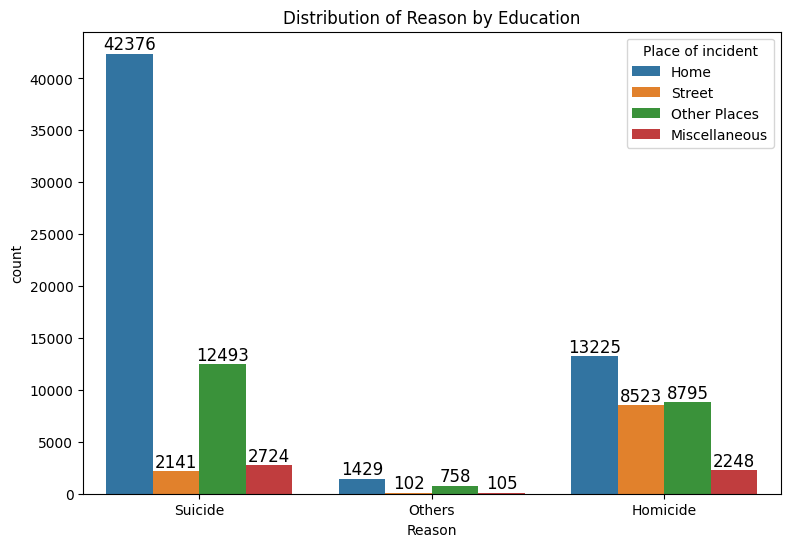

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Education' through a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Place of incident', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Education')
plt.show()

Analysing the countplot diagram, we observed that for all three reasons - 'Suicide', 'Others' and 'Homicide', 'High School' contributes the most. 'Some college' contributes more to 'Suicide' while 'Less than High School' contributes more to 'Others' and 'Homicide'. 'Bachelors' contributes significantly less to the 'Others' and 'Homicide'.